In [3]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [4]:
!jt -tfs 10 -t gruvboxd -ofs 11 -cellw 980

# 1. Read in NAV file

In [5]:
df_160325_nav = pd.read_excel('160325.xlsx')
df_161040_nav = pd.read_excel('161040.xlsx')
df_501082_nav = pd.read_excel('501082.xlsx')
df_506002_nav = pd.read_excel('506002.xlsx')

df_160325_nav['日期'] = pd.to_datetime(df_160325_nav['日期'])
df_161040_nav['日期'] = pd.to_datetime(df_161040_nav['日期'])
df_501082_nav['日期'] = pd.to_datetime(df_501082_nav['日期'])
df_506002_nav['日期'] = pd.to_datetime(df_506002_nav['日期'])

df_160325_nav.drop([151, 152], axis=0, inplace=True)
df_161040_nav.drop([153, 154], axis=0, inplace=True)
df_501082_nav.drop([417, 418], axis=0, inplace=True)
df_506002_nav.drop([153, 154], axis=0, inplace=True)

df_160325_nav.index = df_160325_nav['日期']
df_161040_nav.index = df_161040_nav['日期']
df_501082_nav.index = df_501082_nav['日期']
df_506002_nav.index = df_506002_nav['日期']

df_160325_nav.drop(['代码', '名称', '开盘价', '最高价', '最低价', '成交额(百万)', '成交量', '日期'], axis=1, inplace=True)
df_161040_nav.drop(['代码', '名称', '开盘价', '最高价', '最低价', '成交额(百万)', '成交量', '日期'], axis=1, inplace=True)
df_501082_nav.drop(['代码', '名称', '开盘价', '最高价', '最低价', '成交额(百万)', '成交量', '日期'], axis=1, inplace=True)
df_506002_nav.drop(['代码', '名称', '开盘价', '最高价', '最低价', '成交额(百万)', '成交量', '日期'], axis=1, inplace=True)


df_160325_nav.rename(columns={"收盘价":"160325 NAV"}, inplace=True)
df_161040_nav.rename(columns={"收盘价":"161040 NAV"}, inplace=True)
df_501082_nav.rename(columns={"收盘价":"501082 NAV"}, inplace=True)
df_506002_nav.rename(columns={"收盘价":"506002 NAV"}, inplace=True)

market = pd.concat([df_160325_nav, df_161040_nav, df_501082_nav, df_506002_nav], axis=1)
market.dropna(inplace=True)

# 2. Read in Price data

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))


In [6]:
df_160325_price_temp = pd.read_excel('160325_price.xlsx')
df_161040_price_temp = pd.read_excel('161040_price.xlsx')
df_501082_price_temp = pd.read_excel('501082_price.xlsx')
df_506002_price_temp = pd.read_excel('506002_price.xlsx')

df_160325_price_temp.drop(df_160325_price_temp.tail(2).index, inplace=True)
df_161040_price_temp.drop(df_161040_price_temp.tail(2).index, inplace=True)
df_501082_price_temp.drop(df_501082_price_temp.tail(2).index, inplace=True)
df_506002_price_temp.drop(df_506002_price_temp.tail(2).index, inplace=True)

df_160325_price = pd.DataFrame(df_160325_price_temp[['开盘价', '最高价', '最低价', '收盘价']].T.sum()/4)
df_160325_price.columns = ['160325 price']
df_161040_price = pd.DataFrame(df_161040_price_temp[['开盘价', '最高价', '最低价', '收盘价']].T.sum()/4)
df_161040_price.columns = ['161040 price']
df_501082_price = pd.DataFrame(df_501082_price_temp[['开盘价', '最高价', '最低价', '收盘价']].T.sum()/4)
df_501082_price.columns = ['501082 price']
df_506002_price = pd.DataFrame(df_506002_price_temp[['开盘价', '最高价', '最低价', '收盘价']].T.sum()/4)
df_506002_price.columns = ['506002 price']

df_160325_price.index = pd.to_datetime(df_160325_price_temp['日期'])
df_161040_price.index = pd.to_datetime(df_161040_price_temp['日期'])
df_501082_price.index = pd.to_datetime(df_501082_price_temp['日期'])
df_506002_price.index = pd.to_datetime(df_506002_price_temp['日期'])

market = pd.concat([market, df_160325_price, df_161040_price, df_501082_price, df_506002_price], axis=1)

market.dropna(inplace=True)

market['160325 return rate/year (%)'] = ((market['160325 NAV']/market['160325 price'])**(1/0.857534)-1)*100
market['501082 return rate/year (%)'] = ((market['501082 NAV']/market['501082 price'])**(1/0.90137)-1)*100
market['161040 return rate/year (%)'] = ((market['161040 NAV']/market['161040 price'])**(1/0.947945)-1)*100
market['506002 return rate/year (%)'] = ((market['506002 NAV']/market['506002 price'])**(1/0.986301)-1)*100

market['return rate diff (%)'] = (market.T.tail(4).max() - market.T.tail(4).min())

def cut(s):
    return s.split()[0]

market['Highest'] = market[['160325 return rate/year (%)', '501082 return rate/year (%)', '161040 return rate/year (%)', '506002 return rate/year (%)']].idxmax(axis=1).apply(cut)



Text(0, 0.5, 'NAV')

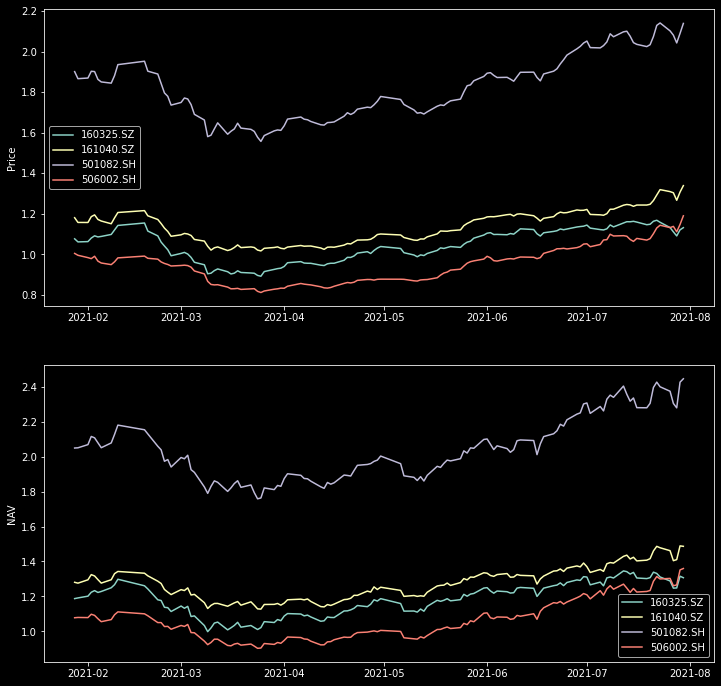

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].plot(market.index, market['160325 price'], label='160325.SZ')
ax[0].plot(market.index, market['161040 price'], label='161040.SZ')
ax[0].plot(market.index, market['501082 price'], label='501082.SH')
ax[0].plot(market.index, market['506002 price'], label='506002.SH')
ax[0].legend(prop={'size':10})
ax[0].set_ylabel('Price')

ax[1].plot(market.index, market['160325 NAV'], label='160325.SZ')
ax[1].plot(market.index, market['161040 NAV'], label='161040.SZ')
ax[1].plot(market.index, market['501082 NAV'], label='501082.SH')
ax[1].plot(market.index, market['506002 NAV'], label='506002.SH')
ax[1].legend(prop={'size':10})
ax[1].set_ylabel('NAV')

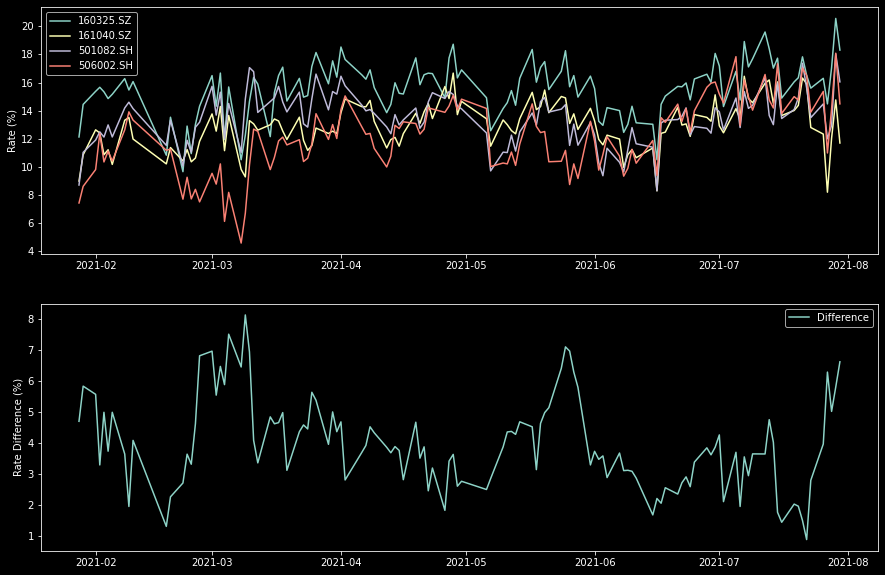

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

ax[0].plot(market.index, market['160325 return rate/year (%)'], label='160325.SZ')
ax[0].plot(market.index, market['161040 return rate/year (%)'], label='161040.SZ')
ax[0].plot(market.index, market['501082 return rate/year (%)'], label='501082.SH')
ax[0].plot(market.index, market['506002 return rate/year (%)'], label='506002.SH')
ax[0].set_ylabel("Rate (%)")
ax[0].legend(prop={'size':10})

ax[1].plot(market.index, market['return rate diff (%)'], label='Difference')
ax[1].set_ylabel("Rate Difference (%)")
ax[1].legend(prop={'size':10})



# 3. EDA

In [9]:
market['Highest'].value_counts()

160325    110
501082      8
161040      2
506002      2
Name: Highest, dtype: int64

In [1]:
market

NameError: name 'market' is not defined

# 4. Strategy

## Naive Model --- Only Buy the fund with the highest "Return Rate/Year (%)"

In [11]:
from Portfolio import portfolio

In [72]:
position = {
    "160325":{
        "price":market.iloc[0]['160325 price'],
        "shares":0
    }, 
    "161040":{
        "price":market.iloc[0]['161040 price'],
        "shares":0
    }, 
    "501082":{
        "price":market.iloc[0]['501082 price'],
        "shares":0
    }, 
    "506002":{
        "price":market.iloc[0]['506002 price'],
        "shares":0
    }
}

fee = 0.2/100

naive = portfolio(cash=1000000, position=position, cost = fee)
log_df = pd.DataFrame()

trade_count = 0

for index, row in market.iterrows():
    print(index.strftime('%Y-%m-%d'))
    print()
    trade = 0
    today_prices = [row['160325 price'], row['161040 price'], row['501082 price'], row['506002 price']]
    
    naive.update_prices(today_prices)
    
    for ticker, info in naive.position.items():
        if ticker != row['Highest'] and info['shares'] != 0 and row[row['Highest'] + ' return rate/year (%)'] - row[ticker + ' return rate/year (%)'] >= 0:
            trade = 1
            cost = info['shares'] * info['price'] * fee
            naive.sell(ticker, info['shares'], cost)
        elif ticker == row['Highest'] and naive.cash > 0:
            trade = 1
            cost = naive.cash * fee
            shares = (naive.cash - cost) / row[row['Highest'] + ' price']
            naive.buy(row['Highest'], shares, cost)
    
    print()
    capital = naive.get_capital()
    naive.get_balance()
    log_df = log_df.append(pd.Series([
        naive.position['160325']['shares'], 
        naive.position['161040']['shares'], 
        naive.position['501082']['shares'], 
        naive.position['506002']['shares'],
        capital,
        trade],
        index = ['160325 shares', '161040 shares', '501082 shares', '506002 shares', 'Capital', 'Trade']), ignore_index=True)
    
    trade_count += trade
    print('--'*40)

2021-01-28

Buy 160325 : 927078.495123084 shares | -998000.0 cash - 2000.0 cost = -1000000.0

Cash:   0.0
160325: 
      Price: 1.0765
      Shares 927078.495123084
161040: 
      Price: 1.1804999999999999
      Shares     0
501082: 
      Price: 1.90075
      Shares     0
506002: 
      Price: 1.0045000000000002
      Shares     0
--------------------------------------------------------------------------------
2021-01-29


Cash:   0.0
160325: 
      Price: 1.0612499999999998
      Shares 927078.495123084
161040: 
      Price: 1.15725
      Shares     0
501082: 
      Price: 1.8659999999999999
      Shares     0
506002: 
      Price: 0.9952499999999999
      Shares     0
--------------------------------------------------------------------------------
2021-02-01


Cash:   0.0
160325: 
      Price: 1.06275
      Shares 927078.495123084
161040: 
      Price: 1.157
      Shares     0
501082: 
      Price: 1.86925
      Shares     0
506002: 
      Price: 0.9837499999999999
      Shares     

      Shares 1035146.3699378371
161040: 
      Price: 1.1857499999999999
      Shares   0.0
501082: 
      Price: 1.89575
      Shares   0.0
506002: 
      Price: 0.983
      Shares     0
--------------------------------------------------------------------------------
2021-06-03


Cash:   0.0
160325: 
      Price: 1.09775
      Shares 1035146.3699378371
161040: 
      Price: 1.18525
      Shares   0.0
501082: 
      Price: 1.88225
      Shares   0.0
506002: 
      Price: 0.96875
      Shares     0
--------------------------------------------------------------------------------
2021-06-04


Cash:   0.0
160325: 
      Price: 1.0982500000000002
      Shares 1035146.3699378371
161040: 
      Price: 1.1875
      Shares   0.0
501082: 
      Price: 1.87175
      Shares   0.0
506002: 
      Price: 0.96675
      Shares     0
--------------------------------------------------------------------------------
2021-06-07


Cash:   0.0
160325: 
      Price: 1.0965
      Shares 1035146.3699378371
16104

In [73]:
naive.get_capital()

1202891.9214502806

In [74]:
log_df.index = market.index

In [75]:
market_performance = pd.concat([market, log_df], axis=1)

In [76]:
pd.set_option('display.float_format', '{:.4f}'.format)

market_performance

,160325 NAV,161040 NAV,501082 NAV,506002 NAV,160325 price,161040 price,501082 price,506002 price,160325 return rate/year (%),501082 return rate/year (%),161040 return rate/year (%),506002 return rate/year (%),return rate diff (%),Highest,160325 shares,161040 shares,501082 shares,506002 shares,Capital,Trade
日期,,,,,,,,,,,,,,,,,,,,
2021-01-28,1.1875,1.2808,2.0492,1.0780,1.0765,1.1805,1.9007,1.0045,12.1244,8.7009,8.9833,7.4224,4.7020,160325,927078.4951,0.0000,0.0000,0.0000,998000.0000,1.0000
2021-01-29,1.1914,1.2760,2.0505,1.0797,1.0612,1.1572,1.8660,0.9952,14.4423,11.0270,10.8544,8.6081,5.8342,160325,927078.4951,0.0000,0.0000,0.0000,983862.0529,0.0000
2021-02-01,1.2014,1.2951,2.0687,1.0788,1.0628,1.1570,1.8693,0.9837,15.3730,11.9046,12.6313,9.8026,5.5704,160325,927078.4951,0.0000,0.0000,0.0000,985252.6707,0.0000
2021-02-02,1.2238,1.3248,2.1154,1.0980,1.0802,1.1858,1.9025,0.9788,15.6614,12.4886,12.4092,12.3632,3.2982,160325,927078.4951,0.0000,0.0000,0.0000,1001476.5444,0.0000
2021-02-03,1.2333,1.3171,2.1074,1.0915,1.0913,1.1945,1.9010,0.9905,15.3383,12.1148,10.8569,10.3456,4.9927,160325,927078.4951,0.0000,0.0000,0.0000,1011674.4078,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,1.2885,1.4618,2.3741,1.3031,1.1320,1.3093,2.1018,1.1317,16.3004,14.4744,12.3295,15.3659,3.9709,160325,1063094.9372,0.0000,0.0000,0.0000,1203423.4689,0.0000
2021-07-27,1.2473,1.4045,2.3041,1.2609,1.1107,1.3035,2.0805,1.1378,14.4775,11.9914,8.1908,10.9823,6.2867,160325,1063094.9372,0.0000,0.0000,0.0000,1180832.7015,0.0000
2021-07-28,1.2485,1.4106,2.2791,1.2659,1.0907,1.2665,2.0423,1.1113,17.0602,12.9455,12.0388,14.1231,5.0214,160325,1063094.9372,0.0000,0.0000,0.0000,1159570.8028,0.0000


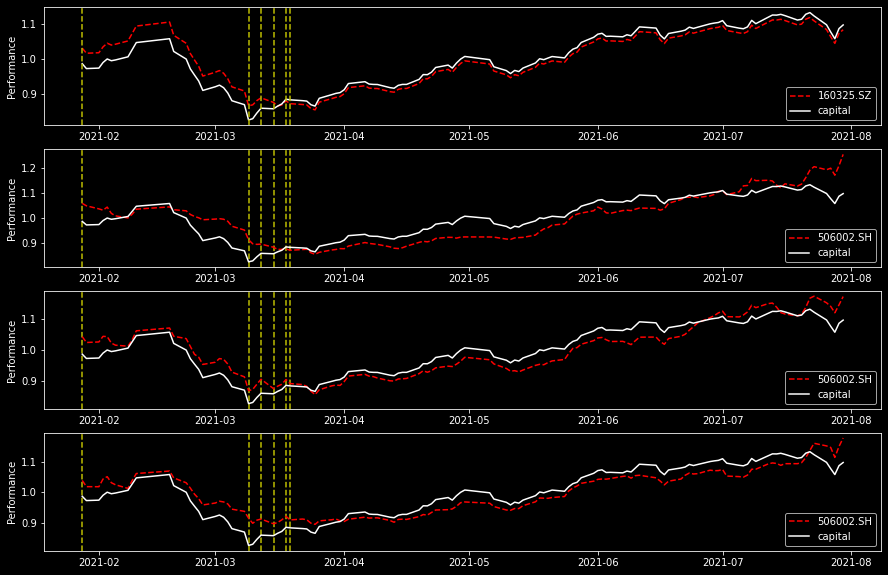

In [68]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10))

ax[0].plot(market_performance.index, market_performance['160325 price']/market_performance['160325 price'].mean(), color='r', ls='--', label='160325.SZ')
ax[0].plot(market_performance.index, market_performance['Capital']/market_performance['Capital'].mean(), 'w', label='capital')
ax[0].set_ylabel("Performance")
ax[0].legend(prop={'size':10})

for index, row in market_performance.iterrows():
    if row['Trade'] == 1:
        ax[0].axvline(x=index, color='y', ls='--')
        ax[1].axvline(x=index, color='y', ls='--')
        ax[2].axvline(x=index, color='y', ls='--')
        ax[3].axvline(x=index, color='y', ls='--')

ax[1].plot(market_performance.index, market_performance['506002 price']/market_performance['506002 price'].mean(), color='r', ls='--', label='506002.SH')
ax[1].plot(market_performance.index, market_performance['Capital']/market_performance['Capital'].mean(), 'w', label='capital')
ax[1].set_ylabel("Performance")
ax[1].legend(prop={'size':10})

ax[2].plot(market_performance.index, market_performance['501082 price']/market_performance['501082 price'].mean(), color='r', ls='--', label='506002.SH')
ax[2].plot(market_performance.index, market_performance['Capital']/market_performance['Capital'].mean(), 'w', label='capital')
ax[2].set_ylabel("Performance")
ax[2].legend(prop={'size':10})

ax[3].plot(market_performance.index, market_performance['161040 price']/market_performance['161040 price'].mean(), color='r', ls='--', label='506002.SH')
ax[3].plot(market_performance.index, market_performance['Capital']/market_performance['Capital'].mean(), 'w', label='capital')
ax[3].set_ylabel("Performance")
ax[3].legend(prop={'size':10})

fig.savefig('Performanc Comparison.png', dpi=150)

In [71]:
market_performance['Trade'].sum()

6.0

In [70]:
initial = market_performance.iloc[0][['160325 price', '161040 price', '501082 price', '506002 price', 'Capital']]
final = market_performance.iloc[-1][['160325 price', '161040 price', '501082 price', '506002 price', 'Capital']]
fund_performance = pd.DataFrame(((final - initial)/initial * 100).sort_values())
fund_performance.columns = ['Performance (%)']
fund_performance.index = fund_performance.index

fund_performance

,Performance (%)
160325 price,5.1092
Capital,11.2449
501082 price,12.5082
161040 price,13.4053
506002 price,18.4669


In [2]:
pd.DataFrame()

NameError: name 'pd' is not defined